# Results: Drivers of Neighbourhood-Scale Emissions
This file generates plots/results related to drivers of neighbourhood-scale emissions.

In [1]:
# Import Libraries
# Data
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import geopandas as gpd
import random

import re
from copy import deepcopy
#from tqdm import tqdm
import tqdm.notebook as tq

#Viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import seaborn as sns

# My funcs and classes

sns.set(font='Helvetica') # Futura? Calibri Light? 
sns.set_style("white")
sns.set_theme(style='ticks')
sns.set_context('talk')

c:\Users\Keagan Rankin\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## Import MC Samples
MC samples for each province are imported

In [2]:
prov = ['nl','ns','nb','pei','qc','on','mb','sk','ab','bc','nwt','yk']

p_samples = {}
for p in prov:
    p_samples[p] = pd.read_csv('C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/mc_samples/'+p+'/inf_mc_samples_'+p+'.csv')

In [3]:
p_samples['bc']

,DAUID,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp
0,59010124,24319.512810,4259.333280,263.946481
1,59410324,21983.383804,3871.390485,633.776288
2,59153765,14786.368072,11695.777350,472.849984
3,59090639,13815.678760,15314.261949,372.191460
4,59151319,14507.569477,709.979093,168.269091
...,...,...,...,...
3685995,59154374,18824.877442,730.434413,228.067403
3685996,59154375,17302.912115,603.546584,236.335686
3685997,59154376,14621.208828,800.751903,160.683578
3685998,59170036,18501.783732,958.726614,126.110582


In [4]:
p_samples['nwt'].groupby(['DAUID']).median().reset_index()

,DAUID,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp
0,61010037,11987.456647,1307.788172,442.072104
1,61010045,17501.214291,3256.171426,360.354715
2,61010046,17227.587263,1535.443582,379.666439
3,61010047,16150.445430,1552.489996,359.505719
4,61010048,14931.067311,853.290226,256.573542
...,...,...,...,...
60,61060160,19564.863606,593.690496,328.322348
61,61060161,19371.120044,1994.380939,230.580267
62,61060162,20273.116793,1146.439620,453.877878
63,61060163,16990.407213,1489.059633,464.503434


## Plot distribution of each
plot the distribution of house, road, and water emissions per capita in each province, and aggregated nationally with min and max samples

houses
houses
houses
houses
houses
houses
houses
houses
houses
houses
roads
roads
roads
roads
roads
roads
roads
roads
roads
roads
water
water
water
water
water
water
water
water
water
water


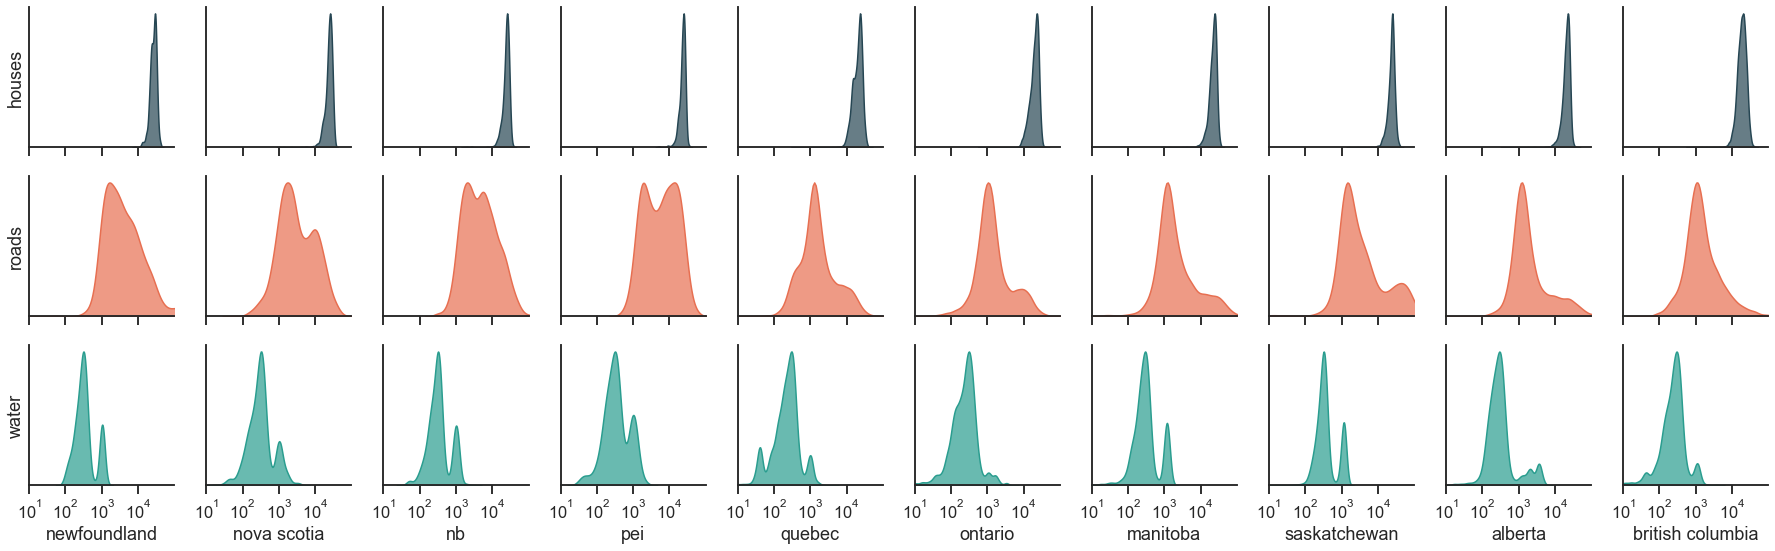

In [58]:
# Plot inits
fig, ax = plt.subplots(3, 10, figsize=(25,8))
pal = ['#264653', '#e76f51', '#2a9d8f']
prov_name = ['newfoundland', 'nova scotia', 'nb', 'pei', 'quebec', 'ontario', 'manitoba', 'saskatchewan', 'alberta', 'british columbia']

# Plotting loop
for i, a in enumerate(ax.reshape(-1)):
    if i <=9:
        print('houses')
        prov_data = p_samples[prov[i]].groupby(['DAUID']).median().reset_index()
        sns.kdeplot(ax=a, data=prov_data,
                    x='house_ghg_pp', #bins=100, kde=True,
                    alpha=0.7, color=pal[0], log_scale=True, fill=True)
    
    if (i>9) & (i<=19):
        print('roads')
        prov_data = p_samples[prov[i-10]].groupby(['DAUID']).median().reset_index()
        sns.kdeplot(ax=a, data=prov_data,
                    x='road_ghg_pp', #bins=100, kde=True,
                    alpha=0.7, color=pal[1], log_scale=True, fill=True)

    if i > 19:
        print('water')
        prov_data = p_samples[prov[i-20]].groupby(['DAUID']).median().reset_index()
        sns.kdeplot(ax=a, data=prov_data,
                    x='water_inf_ghg_pp', #bins=100, kde=True,
                    alpha=0.7, color=pal[2], log_scale=True, fill=True)
        
        a.set_xlabel(prov_name[i-20])


# Plot formatting
for i, a in enumerate(ax.reshape(-1)):
    if i % 10 != 0:
        #a.set_yticks([])
        a.set_ylabel('')

    if i <= 19:
        a.set_xticklabels([])
        a.set_xlabel('')

    a.set_xticks([10, 100, 1000, 10000])
    a.spines[['top','right']].set_visible(False)
    a.set_xlim([10,100000])
    a.set_yticks([])

ax[0,0].set_xticklabels('')
ax[0,0].set_ylabel('houses')
ax[1,0].set_ylabel('roads')
ax[2,0].set_ylabel('water')

plt.tight_layout()

Create the same plot as above, but group some like provinces/territories for less clutter

In [4]:
p_samples['territories'] = pd.concat([p_samples['nwt'], p_samples['yk']])
p_samples['atlantic'] = pd.concat([p_samples['nl'], p_samples['ns'], p_samples['nb'], p_samples['pei']])
p_samples['prairies'] = pd.concat([p_samples['mb'], p_samples['sk'], p_samples['ab']])

houses
houses
houses
houses
houses
houses
roads
roads
roads
roads
roads
roads
water
water
water
water
water
water


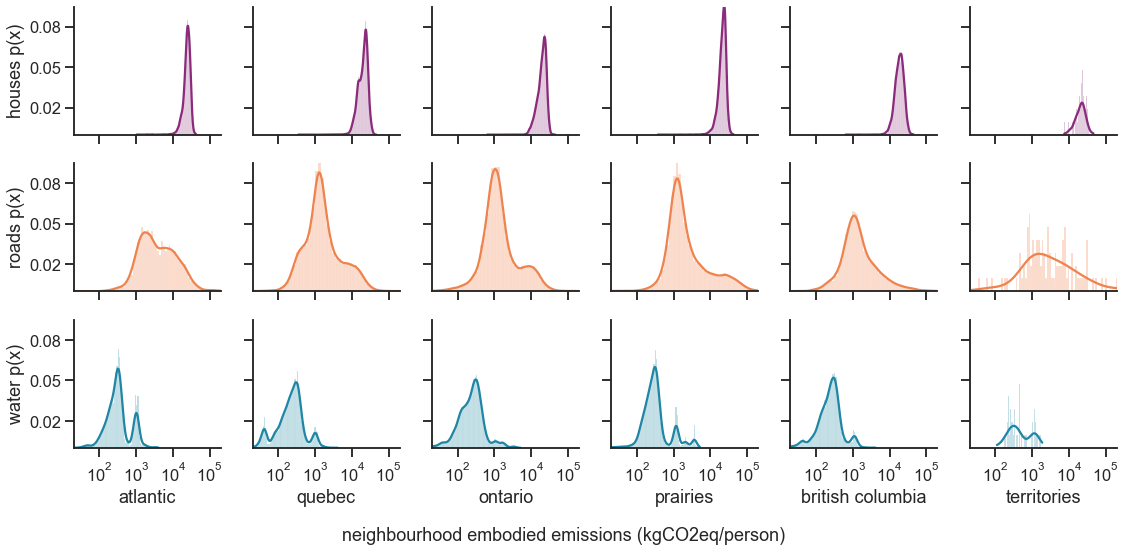

In [5]:
# Plot inits
fig, ax = plt.subplots(3, 6, figsize=(16,8))
pal = ['#264653', '#e76f51', '#2a9d8f']
pal = ['#8B2B7B', '#EF834D', '#2086A5']
prov_group = ['atlantic','qc','on','prairies','bc','territories']
prov_name = ['atlantic','quebec','ontario','prairies','british columbia','territories']

# Plotting loop
for i, a in enumerate(ax.reshape(-1)):
    if i <=5:
        print('houses')
        prov_data = p_samples[prov_group[i]].groupby(['DAUID']).median().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='house_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[0], log_scale=True, fill=True)
    
    if (i>5) & (i<=11):
        print('roads')
        prov_data = p_samples[prov_group[i-6]].groupby(['DAUID']).median().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='road_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[1], log_scale=True, fill=True)

    if i > 11:
        print('water')
        prov_data = p_samples[prov_group[i-12]].groupby(['DAUID']).median().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='water_inf_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[2], log_scale=True, fill=True)
        
        a.set_xlabel(prov_name[i-12])


# Plot formatting
for i, a in enumerate(ax.reshape(-1)):
    a.set_ylabel('')

    if i <= 11:
        a.set_xticklabels([])
        a.set_xlabel('')

    a.spines[['top','right']].set_visible(False)
    a.set_xlim([20,200000])
    a.set_ylim([0,0.095])
    a.set_yticks([0.02, 0.05, 0.08])
    a.set_xticks([100, 1000, 10000, 100000])
    a.set_yticklabels([])

ax[0,0].set_xticklabels('')
ax[0,0].set_ylabel('houses p(x)')
ax[0,0].set_yticklabels([0.02, 0.05, 0.08])
ax[1,0].set_ylabel('roads p(x)')
ax[1,0].set_yticklabels([0.02, 0.05, 0.08])
ax[2,0].set_ylabel('water p(x)')
ax[2,0].set_yticklabels([0.02, 0.05, 0.08])

plt.suptitle('neighbourhood embodied emissions (kgCO2eq/person)', y=-0.002, fontsize=18)
#fig.text(-0.03, 0.5, 'probability', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('plt1a.svg', bbox_inches='tight')

Plot min and max

houses
houses
houses
houses
houses
houses
roads
roads
roads
roads
roads
roads
water
water
water
water
water
water


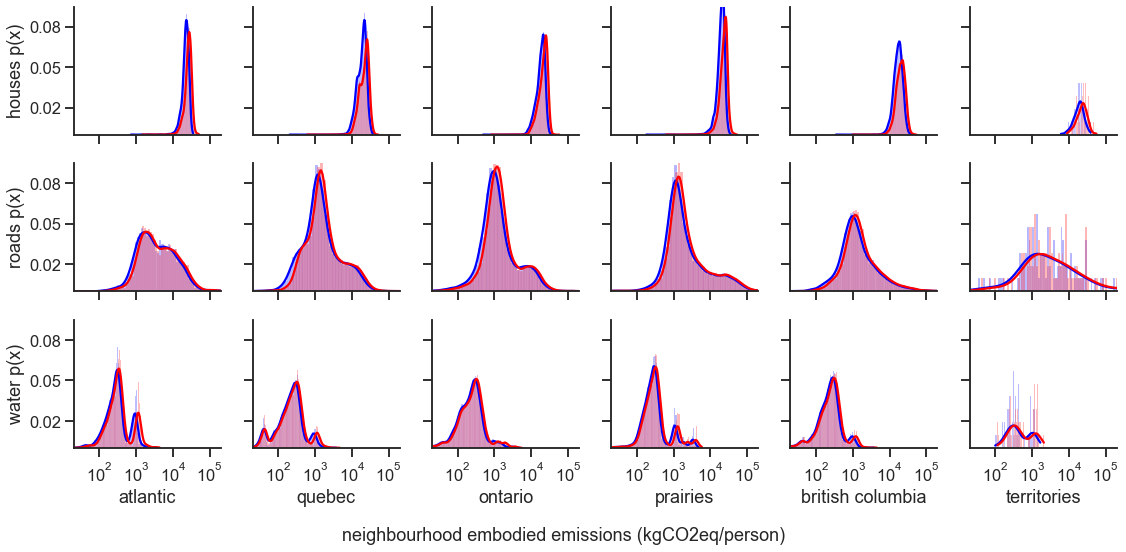

In [7]:
# Plot inits
fig, ax = plt.subplots(3, 6, figsize=(16,8))
pal = ['#264653', '#e76f51', '#2a9d8f']
pal = ['#8B2B7B', '#EF834D', '#2086A5']
pal = ['blue','red']
prov_group = ['atlantic','qc','on','prairies','bc','territories']
prov_name = ['atlantic','quebec','ontario','prairies','british columbia','territories']

# Plotting loop
for i, a in enumerate(ax.reshape(-1)):
    if i <=5:
        print('houses')
        prov_data = p_samples[prov_group[i]].groupby(['DAUID']).min().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='house_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[0], log_scale=True, fill=True)
        
        prov_data = p_samples[prov_group[i]].groupby(['DAUID']).max().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='house_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[1], log_scale=True, fill=True)
    
    if (i>5) & (i<=11):
        print('roads')
        prov_data = p_samples[prov_group[i-6]].groupby(['DAUID']).min().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='road_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[0], log_scale=True, fill=True)
        
        prov_data = p_samples[prov_group[i-6]].groupby(['DAUID']).max().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='road_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[1], log_scale=True, fill=True)

    if i > 11:
        print('water')
        prov_data = p_samples[prov_group[i-12]].groupby(['DAUID']).min().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='water_inf_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[0], log_scale=True, fill=True)
        
        prov_data = p_samples[prov_group[i-12]].groupby(['DAUID']).max().reset_index()
        sns.histplot(ax=a, data=prov_data,
                    x='water_inf_ghg_pp', bins=100, kde=True, stat='probability',
                    alpha=0.3, color=pal[1], log_scale=True, fill=True)
        
        a.set_xlabel(prov_name[i-12])


# Plot formatting
for i, a in enumerate(ax.reshape(-1)):
    a.set_ylabel('')

    if i <= 11:
        a.set_xticklabels([])
        a.set_xlabel('')

    a.spines[['top','right']].set_visible(False)
    a.set_xlim([20,200000])
    a.set_ylim([0,0.095])
    a.set_yticks([0.02, 0.05, 0.08])
    a.set_xticks([100, 1000, 10000, 100000])
    a.set_yticklabels([])

ax[0,0].set_xticklabels('')
ax[0,0].set_ylabel('houses p(x)')
ax[0,0].set_yticklabels([0.02, 0.05, 0.08])
ax[1,0].set_ylabel('roads p(x)')
ax[1,0].set_yticklabels([0.02, 0.05, 0.08])
ax[2,0].set_ylabel('water p(x)')
ax[2,0].set_yticklabels([0.02, 0.05, 0.08])

plt.suptitle('neighbourhood embodied emissions (kgCO2eq/person)', y=-0.002, fontsize=18)
#fig.text(-0.03, 0.5, 'probability', va='center', rotation='vertical')
plt.tight_layout()
#plt.savefig('plt1SI.svg', bbox_inches='tight')

## Fits and Statistics
Fit linear regression/heatmap some variables to see what drives emissions. Specifically, look at percentage of single family homes and density vs. high they drive emissions, reduction potential of neighbourhoods which are mainly mid/high or mid/low rise vs. mainly single family.

Summary statistics (section 3-1: range of embodied housing emissions)

In [6]:
# Canadian min, max, and medians
all_median = pd.DataFrame(columns=p_samples['nl'].columns)
all_max = pd.DataFrame(columns=p_samples['nl'].columns)
all_min = pd.DataFrame(columns=p_samples['nl'].columns)
for p in prov:
    ps = p_samples[p].groupby(['DAUID']).median().reset_index()
    all_median = pd.concat([all_median, ps])

    pma = p_samples[p].groupby(['DAUID']).max().reset_index()
    all_max = pd.concat([all_max, ps])

    pmi = p_samples[p].groupby(['DAUID']).min().reset_index()
    all_min = pd.concat([all_min, ps])

In [8]:
print('ghg per capita statistics')
print('max building ', all_max['house_ghg_pp'].max())
print('min building ', all_min['house_ghg_pp'].min())
print('median building ', all_median['house_ghg_pp'].median())
print('median road ',all_median['road_ghg_pp'].median())
print('median water ',all_median['water_inf_ghg_pp'].median())

ghg per capita statistics
max building  46682.849332181795
min building  345.8831309490581
median building  21028.99069939591
median road  1386.6031544326156
median water  260.2154895839427


Some linear correlations/predictors of higher per capita neighbourhood emissions

In [9]:
from fig_package.fig_sample.road_clean_sample import *
from fig_package.fig_sample.house_clean_sample import *
import statsmodels.api as sm

The long codebox creating all_prov_reg_info does not have to be run: I stored all_prov_reg_info. Just run the one below and continue with analysis

In [14]:
all_prov_reg_info = pd.read_csv('C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/results/canada_da_info_with_emissions.csv')
all_prov_reg_info['tot'] = all_prov_reg_info[['flat_duplex', 'lowrise_apartment', 'mid_high_rise','rowhouse', 'semi_detached','single_detached']].sum(axis=1)
all_prov_reg_info['sf_percentage'] = all_prov_reg_info['single_detached']/all_prov_reg_info['tot']

In [8]:
# Importing all of the DA information so I can compare drivers of neighbourhood emissions.
p_name_full = ['newfoundland','nova_scotia','new_brunswick','pei','quebec',
               'ontario','manitoba','saskatchewan','alberta','british_columbia', 'nwt', 'yukon']
prov = ['nl','ns','nb','pei','qc','on','mb','sk','ab','bc','nwt','yk']
foo_full = []
for i, p in enumerate(prov):
    house_sampler = HouseSample(master='C:/Users/Keagan Rankin/')
    house_sampler.province_name = p_name_full[i]
    foo = house_sampler.get_prov_da(prov_name=house_sampler.province_name,
                                shapefile_path=house_sampler.shapefile_path,
                                census_data_path=house_sampler.path + 'da_census_data_reduced/' + house_sampler.prov_da_file_map[house_sampler.province_name]
                                )
    foo2 = foo.copy()
    foo_r = foo2#[['DAUID','avg_household_size','pop_km2','single_detached','mid_high_rise','missing_middle_per_person','tot_pd_check_count']]
    foo_r['DAUID'] = foo_r['DAUID'].astype(int)
    foo_r['sf_percentage'] = foo_r['single_detached']/foo_r['tot_pd_check_count']
    foo_r = foo_r.set_index('DAUID').join(p_samples[p].groupby(['DAUID']).median(), on='DAUID').dropna()
    foo_r
    foo_full.append(foo_r)
    

[I] Reading DA Shapefile...


MemoryError: 

In [12]:
all_prov_reg_info = pd.concat(foo_full)

NameError: name 'foo_full' is not defined

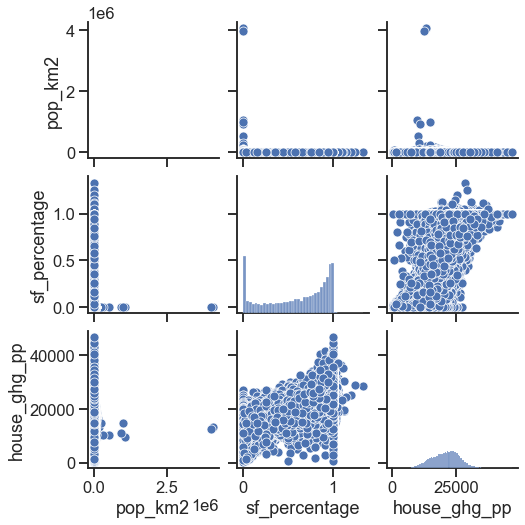

In [6]:
sns.pairplot(all_prov_reg_info[['pop_km2','sf_percentage','house_ghg_pp']])

<AxesSubplot:xlabel='sf_percentage', ylabel='water_inf_ghg_pp'>

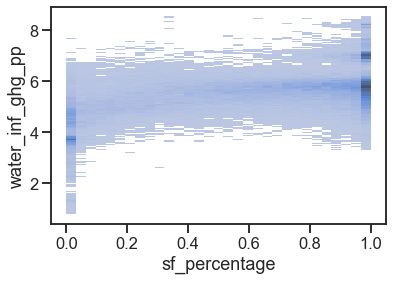

In [6]:
#Plug in stuff to see specific instances. Apply np.log to variables where needed.
sns.histplot(x=all_prov_reg_info['sf_percentage'], y=np.log(all_prov_reg_info['water_inf_ghg_pp']))

In [15]:
all_prov_reg_info.columns

Index(['DAUID', 'LANDAREA', 'PRUID', 'geometry', 'avg_household_size',
       'flat_duplex', 'lowrise_apartment', 'mid_high_rise', 'mobile', 'other',
       'pop_2021', 'private_dwellings', 'rowhouse', 'semi_detached',
       'single_detached', 'tot_pd_check_count', 'pop_km2', 'plex_per_person',
       'row_per_person', 'lowrise_per_person', 'midhigh_per_person',
       'semi_per_person', 'single_per_person', 'missing_middle_per_person',
       'sf_percentage', 'house_ghg_pp', 'road_ghg_pp', 'water_inf_ghg_pp',
       'tot'],
      dtype='object')

Use the statsmodel API implementation below for section 3-1 R2 and p values on regressions

In [31]:
# Plug in sf_percentage, pop_km2 vs X_ghg_pp. Apply np.log where needed
model = sm.OLS(all_prov_reg_info['avg_household_size'], np.log(all_prov_reg_info['house_ghg_pp']))
fitted = model.fit()
print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:     avg_household_size   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          1.199e+06
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                        0.00
Time:                        17:04:37   Log-Likelihood:                         -44137.
No. Observations:               55709   AIC:                                  8.828e+04
Df Residuals:                   55708   BIC:                                  8.829e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [27]:
np.exp(0.003)

1.003004504503377

How much lower are emissions of neighbourhoods with <=10% single family homes vs. >=90%?

In [6]:
# <10% single family
avg_10sf = all_prov_reg_info[all_prov_reg_info['sf_percentage'] <= 0.1].iloc[:,-3:].sum(axis=1).mean()
avg_90sf = all_prov_reg_info[all_prov_reg_info['sf_percentage'] >= 0.9].iloc[:,-3:].sum(axis=1).mean()

print(avg_90sf)
print(avg_10sf)
print(avg_90sf-avg_10sf)
print((avg_90sf-avg_10sf)/avg_90sf)

34459.52417224266
14901.86096359401
19557.66320864865
0.5675546508097885


Nicely plot some of the investigated relationships

In [52]:
all_prov_reg_info['mm_percentage'] = all_prov_reg_info[['flat_duplex','lowrise_apartment','rowhouse','semi_detached']].sum(axis=1)/all_prov_reg_info['tot']
all_prov_reg_info.columns

Index(['DAUID', 'LANDAREA', 'PRUID', 'geometry', 'avg_household_size',
       'flat_duplex', 'lowrise_apartment', 'mid_high_rise', 'mobile', 'other',
       'pop_2021', 'private_dwellings', 'rowhouse', 'semi_detached',
       'single_detached', 'tot_pd_check_count', 'pop_km2', 'plex_per_person',
       'row_per_person', 'lowrise_per_person', 'midhigh_per_person',
       'semi_per_person', 'single_per_person', 'missing_middle_per_person',
       'sf_percentage', 'house_ghg_pp', 'road_ghg_pp', 'water_inf_ghg_pp',
       'tot', 'mm_percentage'],
      dtype='object')

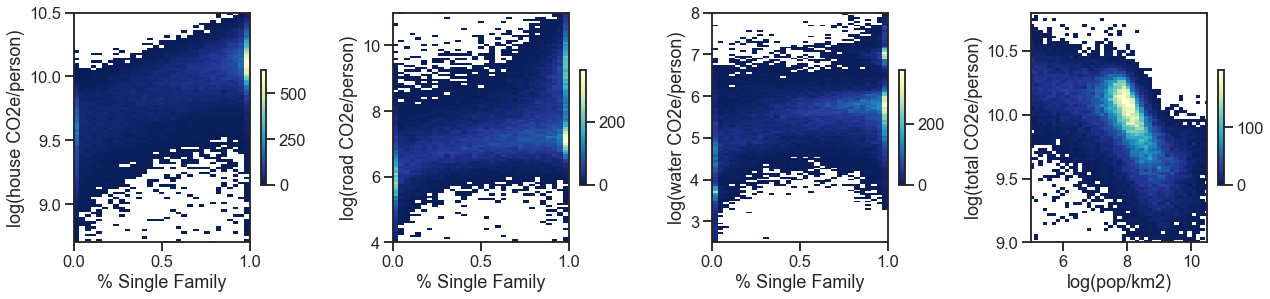

In [171]:
fig, ax = plt.subplots(1,4, figsize=(18,4.5))

cmapr = 'YlGnBu_r'

sns.histplot(ax=ax[0], x=all_prov_reg_info['sf_percentage'], y=np.log(all_prov_reg_info['house_ghg_pp']),
             cmap=cmapr, cbar=True, cbar_kws={'shrink':0.5}
                )

sns.histplot(ax=ax[1], x=all_prov_reg_info['sf_percentage'], y=np.log(all_prov_reg_info['road_ghg_pp']),
             cmap=cmapr, cbar=True, cbar_kws={'shrink':0.5}
                )

sns.histplot(ax=ax[2], x=all_prov_reg_info['sf_percentage'], y=np.log(all_prov_reg_info['water_inf_ghg_pp']),
             cmap=cmapr, cbar=True, cbar_kws={'shrink':0.5}
                )

#sns.histplot(ax=ax[3], x=all_prov_reg_info['avg_household_size'], y=np.log(all_prov_reg_info[['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp']].sum(axis=1)),
#             cmap=cmapr, bins=(55,250)
#                )
sns.histplot(ax=ax[3], x=np.log(all_prov_reg_info['pop_km2']), y=np.log(all_prov_reg_info[['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp']].sum(axis=1)),
             cmap=cmapr, cbar=True, cbar_kws={'shrink':0.5}
                )

xl = [(0,1), (0,1), (0,1), (5, 10.5)]
yl = [(8.7,10.5), (4,11), (2.5,8), (9,10.8)]
yll = ['log(house CO2e/person)','log(road CO2e/person)', 'log(water CO2e/person)', 'log(total CO2e/person)']
xll = ['% Single Family','% Single Family', '% Single Family', 'log(pop/km2)']
for i, a in enumerate(ax.reshape(-1)):
   a.set_ylim(yl[i])
   a.set_xlim(xl[i])

   a.set_ylabel(yll[i])
   a.set_xlabel(xll[i])

#ax[0].set_title('Neighbourhood Total Emissions \n(TE) (kgCO2e/person)', pad=30)

#sns.kdeplot(ax=ax[1], x=np.log(all_prov_reg_info['pop_km2']), y=np.log(all_prov_reg_info[['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp']].sum(axis=1)),
#            levels=100, thresh=0
#                )
#sns.histplot(ax=ax[2], x=all_prov_reg_info['sf_percentage'], y=np.log(all_prov_reg_info['water_inf_ghg_pp']))


# try creating colorbar
#norm = plt.Normalize(all_prov_reg_info['house_ghg_pp'].min(), all_prov_reg_info['house_ghg_pp'].max())
#sm = plt.cm.ScalarMappable(cmap=cmapr, norm=norm)
#sm.set_array([])
#cbar1 = fig.colorbar(sm, shrink=0.5, orientation='vertical')

plt.tight_layout()

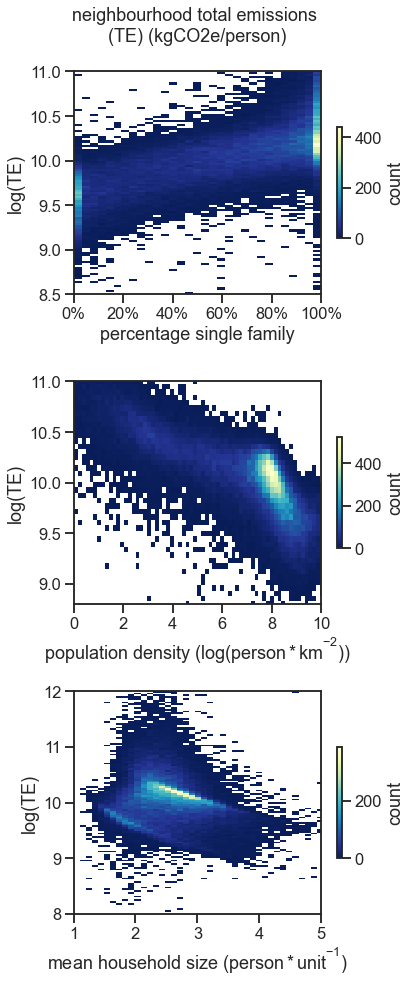

In [223]:
fig, ax = plt.subplots(3,1, figsize=(6,14))
cmapr = 'YlGnBu_r'#'rocket_r'

sns.histplot(ax=ax[0], x=all_prov_reg_info['sf_percentage']*100, y=np.log(all_prov_reg_info[['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp']].sum(axis=1)),
             cmap=cmapr, cbar=True, cbar_kws={'label': 'count', 'shrink':0.5}
                )

sns.histplot(ax=ax[1], x=np.log(all_prov_reg_info['pop_km2']), y=np.log(all_prov_reg_info[['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp']].sum(axis=1)),
             cmap=cmapr, bins=(150,150), cbar=True, cbar_kws={'label': 'count', 'shrink':0.5}
                )
sns.histplot(ax=ax[2], x=all_prov_reg_info['avg_household_size'], y=np.log(all_prov_reg_info[['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp']].sum(axis=1)),
             cmap=cmapr, bins=(55,250), cbar=True, cbar_kws={'label': 'count', 'shrink':0.5}
                )

xl = [(0,100), (0,10), (1, 5)]
yl = [(8.5,11), (8.8,11), (8,12)]
yll = ['log(TE)','log(TE)', 'log(TE)']
xll = ['percentage single family', 'population density (log($\mathregular{person*km^{-2}}$))', 'mean household size ($\mathregular{person*unit^{-1}}$)']
for i, a in enumerate(ax.reshape(-1)):
   a.set_ylim(yl[i])
   a.set_xlim(xl[i])

   a.set_ylabel(yll[i])
   a.set_xlabel(xll[i])


ax[0].xaxis.set_major_formatter(mtick.PercentFormatter())
ax[0].set_title('neighbourhood total emissions \n(TE) (kgCO2e/person)', pad=30)
#sns.kdeplot(ax=ax[1], x=np.log(all_prov_reg_info['pop_km2']), y=np.log(all_prov_reg_info[['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp']].sum(axis=1)),
#            levels=100, thresh=0
#                )
#sns.histplot(ax=ax[2], x=all_prov_reg_info['sf_percentage'], y=np.log(all_prov_reg_info['water_inf_ghg_pp']))

plt.tight_layout()
#plt.savefig('plt1c.png', bbox_inches='tight')

## Principle Component Analysis
Borrow and steal from all_sampling.py. Could also lay it out as four plots: 1 plot showing increased single family, and the next four plots showing increase in the three infrastructure types

In [224]:
# Init road info
road_cleaner = RoadClean(master='C:/Users/Keagan Rankin/')
road_cleaner.province_name = 'ontario'
road_type_map = {'Local / Street': 'Secondary', 
                              'Arterial': 'Primary',
                              'Collector': 'Secondary',
                              }


roads_clean = road_cleaner.full_road_clean_map(user_type_map=road_type_map)
roads_clean

Cleaning road data...
option: editing road_type_map w/ user_type_map

Import-clean complete. Returning.


,Join_Count,JOIN_FID,TARGET_FID,DAUID,NID,PAVSURF,ROADCLASS,NBRLANES,LENGTH_GEO
833983,1,66,20092,35580353,9f6eb181cb524d18ba9465e797b521b4,Unknown,Secondary,2.0,0.490307
833956,1,66,20091,35580352,9f6eb181cb524d18ba9465e797b521b4,Unknown,Secondary,2.0,0.490307
841925,1,94,20114,35580379,983b0e7f323248aa9165ed2a2ec8fee7,Unknown,Secondary,2.0,166.833105
841723,1,94,20113,35580378,983b0e7f323248aa9165ed2a2ec8fee7,Unknown,Secondary,2.0,166.833105
844590,1,433,20132,35580398,d88bc2ef74714272ab043d5c9f42294c,Unknown,Secondary,2.0,10.202228
...,...,...,...,...,...,...,...,...,...
46632,1,850075,1398,35061464,6fdebe28da884545b85505ccebd679dd,Unknown,Secondary,2.0,219.018188
75137,1,850076,1996,35090130,d2dec90cce09442c8704c47220dd2bf6,Unknown,Secondary,2.0,35.017254
801607,1,850092,19633,35560314,b459ffad8bd94295bb0a8ac3c8f614c7,Unknown,Highway,2.0,11286.837607
824031,1,850093,19874,35570379,a0bd6315caa049b58837ed842abffa16,Unknown,Primary,2.0,3272.716649


Maybe pivot road information, or simply group by raw road length. Add any required columns for PCA here

In [225]:
all_prov_reg_info['pop_km2_log'] = np.log(all_prov_reg_info['pop_km2'])
all_prov_reg_info['non_single_family_per_person'] = all_prov_reg_info['midhigh_per_person'] + all_prov_reg_info['missing_middle_per_person']
all_prov_reg_info.columns

Index(['DAUID', 'LANDAREA', 'PRUID', 'geometry', 'avg_household_size',
       'flat_duplex', 'lowrise_apartment', 'mid_high_rise', 'mobile', 'other',
       'pop_2021', 'private_dwellings', 'rowhouse', 'semi_detached',
       'single_detached', 'tot_pd_check_count', 'pop_km2', 'plex_per_person',
       'row_per_person', 'lowrise_per_person', 'midhigh_per_person',
       'semi_per_person', 'single_per_person', 'missing_middle_per_person',
       'sf_percentage', 'house_ghg_pp', 'road_ghg_pp', 'water_inf_ghg_pp',
       'tot', 'mm_percentage', 'pop_km2_log', 'non_single_family_per_person'],
      dtype='object')

Run PCA pipeline on a set of vars

In [226]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fig_package.fig_helper.helper import Helper

In [227]:
# Def PCA columns
cols_pca = ['single_per_person','midhigh_per_person','plex_per_person','lowrise_per_person','row_per_person','semi_per_person',
            #'highway_len','local_len','primary_len','secondary_len',
            #'avg_household_size', 'pop_2021'
            ]

# Fit transform
#da_house_for_pc = handy.drop_outliers_iqr(da_house_road,'housing_ghg_pp', f=1.5)
#da_house_for_pc = handy.drop_outliers_iqr(da_house_for_pc,'road_ghg_pp', f=1.5)
da_house_for_pc = all_prov_reg_info
da_house_road_scaled = StandardScaler().fit_transform(da_house_for_pc[cols_pca].dropna())
pca = PCA()
can_da_pcs = pca.fit_transform(da_house_road_scaled)

# Store
cols= ['pc{}'.format(i) for i in range(1,da_house_road_scaled.shape[1]+1)]
dahr_pcs_df = pd.DataFrame(data=can_da_pcs,
                            columns=cols)

Plot

dropped:  4
dropped:  9709
dropped:  5331


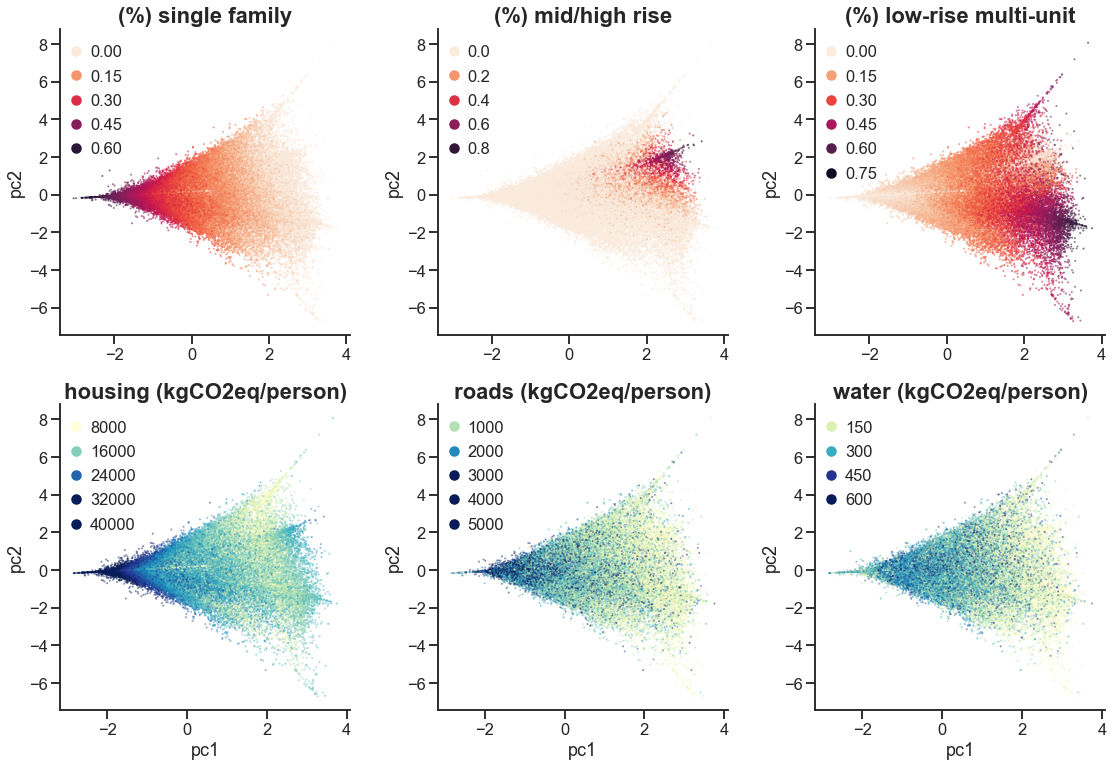

In [12]:
# Plot
fig, axes2 = plt.subplots(2,3, figsize=(16,11))
titles = ['single detached/person', 'mid-high rise/person', 'missing middle/person',
         'housing (kgCO2eq/person)', 'roads (kgCO2eq/person)', 'water (kgCO2eq/person)']
hue_cols = ['single_per_person','midhigh_per_person','missing_middle_per_person', 'house_ghg_pp','road_ghg_pp', 'water_inf_ghg_pp']
#hue_cols = ['single_per_person','non_single_family_per_person','pop_km2', 'house_ghg_pp','road_ghg_pp', 'water_inf_ghg_pp']

# Alternative
titles = ['(%) single family', '(%) mid/high rise', '(%) low-rise multi-unit',
         'housing (kgCO2eq/person)', 'roads (kgCO2eq/person)', 'water (kgCO2eq/person)']
#hue_cols = ['percent_single_family','percent_mid_high','percent_missing_middle', 'housing_ghg_pp','road_ghg_pp', 'water_inf_ghg_pp']


pal = ['PuRd','RdPu', 'BuGn']#'BuPu']
pal = ['YlGnBu','YlGnBu', 'YlGnBu']
#pal = ['rocket_r', 'rocket_r', 'rocket_r']
fs = [2.5, 1, 1.5]
hue_norms = [(8000,30000), (200,3000), (70,500)]
handy= Helper()

for i, ax in enumerate(axes2.reshape(-1)):
  # REPLOT ORIGINAL PCA
  if i <= 2:
    plotr = dahr_pcs_df.set_index(da_house_for_pc[cols_pca].dropna().index).join(da_house_for_pc)
    #plotr = handy.drop_outliers_iqr(plotr, 'road_ghg_pp',f=1.5)
    sns.scatterplot(ax=ax, data=plotr, 
                    x='pc1', y='pc2', hue=hue_cols[i],
                    alpha=0.6, s=4, legend=True, linewidth=0.0, palette='rocket_r'
                  )
    ax.legend(frameon=False, loc='upper left', handlelength=0.1, handleheight=1)
    ax.set_title(titles[i], fontsize=22, fontweight='bold')
    ax.set_xlabel('')
    ax.spines[['top','right']].set_visible(False)

  elif i > 2:
    plotr = dahr_pcs_df.set_index(da_house_for_pc[cols_pca].dropna().index).join(da_house_for_pc)

    sns.scatterplot(ax=ax, data=handy.drop_outliers_iqr(plotr, hue_cols[i], f=fs[i-3]),#'road_ghg_pp', f=1), 
                x='pc1', y='pc2', hue=hue_cols[i], hue_norm=hue_norms[i-3],
                alpha=0.5, s=4, linewidth=0.0, palette=pal[i-3]
              )
    ax.set_title(titles[i], fontsize=22, fontweight='bold')
    ax.legend(frameon=False, loc='upper left', handlelength=0.1, handleheight=1)
    ax.spines[['top','right']].set_visible(False)

    # other to get cool graphic
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    #ax.get_legend().remove()



plt.tight_layout()

In [228]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [234]:
da_house_for_pc['sf_percentage'] = da_house_for_pc['sf_percentage']*100

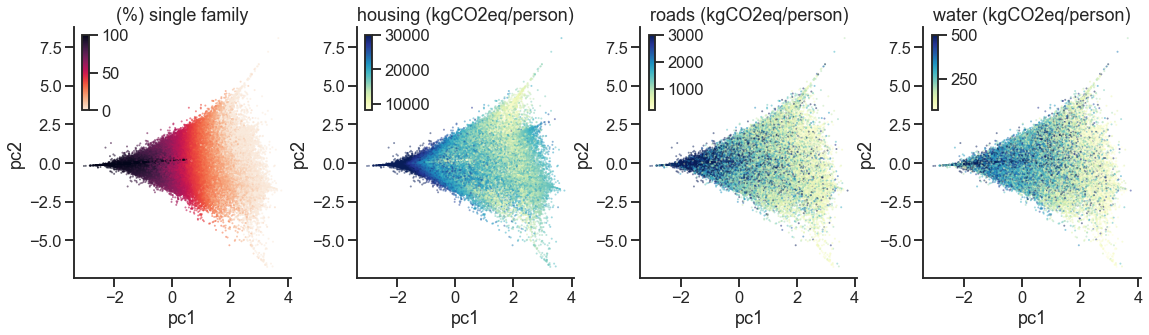

In [236]:
# Plot
fig, axes2 = plt.subplots(1,4, figsize=(16,4.5))
titles = ['single detached/person', 'mid-high rise/person', 'missing middle/person',
         'housing (kgCO2eq/person)', 'roads (kgCO2eq/person)', 'water (kgCO2eq/person)']
#hue_cols = ['single_per_person', 'house_ghg_pp','road_ghg_pp', 'water_inf_ghg_pp']
hue_cols = ['sf_percentage', 'house_ghg_pp','road_ghg_pp', 'water_inf_ghg_pp']

# Alternative
titles = ['(%) single family', 'housing (kgCO2eq/person)', 'roads (kgCO2eq/person)', 'water (kgCO2eq/person)']
#hue_cols = ['percent_single_family','percent_mid_high','percent_missing_middle', 'housing_ghg_pp','road_ghg_pp', 'water_inf_ghg_pp']


pal = ['PuRd','RdPu', 'BuGn']#'BuPu']
pal = ['YlGnBu','YlGnBu', 'YlGnBu']
#pal = ['rocket_r', 'rocket_r', 'rocket_r']
fs = [2.5, 1, 1.5]
hue_norms = [(8000,30000), (200,3000), (70,500)]
handy= Helper()
plt.tight_layout()

for i, ax in enumerate(axes2.reshape(-1)):
  # REPLOT ORIGINAL PCA
  if i <= 0:
    plotr = dahr_pcs_df.set_index(da_house_for_pc[cols_pca].dropna().index).join(da_house_for_pc)
    #plotr = handy.drop_outliers_iqr(plotr, 'road_ghg_pp',f=1.5)
    sns.scatterplot(ax=ax, data=plotr, 
                    x='pc1', y='pc2', hue=hue_cols[i],
                    alpha=0.6, s=4, legend='brief', linewidth=0.0, palette='rocket_r'
                  )
    ax.legend(frameon=False, loc='upper left', handlelength=0.1, handleheight=1, #bbox_to_anchor=(1,1)
              )
    ax.set_title(titles[i], fontsize=18, #fontweight='bold'
                 )
    #ax.set_xlabel('')
    ax.spines[['top','right']].set_visible(False)

    # try creating colorbar
    norm = plt.Normalize(plotr[hue_cols[i]].min(), plotr[hue_cols[i]].max())
    sm = plt.cm.ScalarMappable(cmap="rocket_r", norm=norm)
    sm.set_array([])
    cbaxes = inset_axes(ax, width="3%", height="30%", loc='upper left') 
    cbar1 = fig.colorbar(sm, shrink=0.5, cax=cbaxes, orientation='vertical')
    ax.get_legend().remove()

  elif i > 0:
    plotr = dahr_pcs_df.set_index(da_house_for_pc[cols_pca].dropna().index).join(da_house_for_pc)

    sns.scatterplot(ax=ax, data=plotr,#handy.drop_outliers_iqr(plotr, hue_cols[i], f=fs[i-3+2]),#'road_ghg_pp', f=1), 
                x='pc1', y='pc2', hue=hue_cols[i], hue_norm=hue_norms[i-3+2],
                alpha=0.5, s=4, linewidth=0.0, palette=pal[i-3+2], legend='brief'
              )
    ax.set_title(titles[i], fontsize=18, #fontweight='bold'
                 )
    ax.legend(frameon=False, loc='upper left', handlelength=0.1, handleheight=1,# bbox_to_anchor=(1,1)
              )
    ax.spines[['top','right']].set_visible(False)

    # try creating colorbar for 2nd half of plots
    norm = plt.Normalize(hue_norms[i-1][0], hue_norms[i-1][1])
    sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
    sm.set_array([])
    cbaxes = inset_axes(ax, width="3%", height="30%", loc='upper left') 
    cbar1 = fig.colorbar(sm, shrink=0.5, cax=cbaxes, orientation='vertical')
    ax.get_legend().remove()

    # other to get cool graphic
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    #ax.get_legend().remove()



#plt.tight_layout()
#plt.savefig('plt1b.png', dpi=300, bbox_inches='tight')